In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
from sklearn.model_selection import train_test_split 

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import accuracy_score 

In [6]:
credit_card = pd.read_csv('/Users/aamirpirani/Desktop/CREDIT_CARD_FRAUD_DETECTION/creditcard.csv')

In [7]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
## Distribution of legit & fraudulent transactions 

In [11]:
credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
## Separating the data for analysis 

In [13]:
legit = credit_card[credit_card.Class == 0]

In [14]:
fraud = credit_card[credit_card.Class == 1]

In [15]:
## Statistical measures of the data

In [16]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
## Evaluating values

In [19]:
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
## Under-Sampling

In [21]:
legit_sample = legit.sample(n=492)

In [22]:
## Concatenating Data Frames

In [23]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173388,121465.0,-2.233241,0.778847,1.800158,-0.043346,-0.792062,0.658907,-0.289372,-0.905557,-0.144229,...,1.598154,-0.297757,-0.360338,-0.022718,0.485693,-0.714799,0.269319,-0.214793,144.00,0
101372,67811.0,1.242973,-1.265329,1.702630,-0.122239,-2.175901,0.344076,-1.803104,0.487345,1.080249,...,0.158221,0.724774,0.010413,0.411662,0.275532,-0.027695,0.086043,0.021588,4.00,0
101690,67917.0,-2.269731,-2.588802,3.265456,-0.804249,0.838942,-0.919177,-2.340535,0.624872,-0.141570,...,0.431995,0.833557,-0.000765,0.397282,0.566307,-0.138144,0.024560,0.105048,1.40,0
35007,37916.0,-1.129671,-0.786861,1.859954,-1.511292,-0.117656,-1.279177,-0.021612,-0.065530,-1.307502,...,0.201213,0.007105,0.272966,0.361496,-0.043707,-0.569514,0.025872,0.133222,103.92,0
243978,152156.0,2.247382,-1.488485,-1.214601,-1.721383,-1.016294,-0.549061,-0.950512,-0.202986,-1.193130,...,-0.655601,-1.654332,0.393150,-1.122884,-0.571767,-0.629206,-0.003919,-0.040033,75.00,0


In [25]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94121.219512,-0.050842,-0.110226,-0.027881,0.097051,0.007157,-0.065733,0.139808,-0.032571,-0.100233,...,0.022772,-0.010022,0.016730,-0.034943,-0.033065,0.027837,-0.014902,0.000268,-0.010490,100.626646
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
## Splitting the data into Features & Targets 

In [28]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
173388  121465.0 -2.233241  0.778847  1.800158 -0.043346 -0.792062  0.658907   
101372   67811.0  1.242973 -1.265329  1.702630 -0.122239 -2.175901  0.344076   
101690   67917.0 -2.269731 -2.588802  3.265456 -0.804249  0.838942 -0.919177   
35007    37916.0 -1.129671 -0.786861  1.859954 -1.511292 -0.117656 -1.279177   
243978  152156.0  2.247382 -1.488485 -1.214601 -1.721383 -1.016294 -0.549061   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(Y)

173388    0
101372    0
101690    0
35007     0
243978    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [31]:
## Splitting data for testing & training

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [34]:
## Model Training 

In [35]:
## Logistic Regression 

In [36]:
model = LogisticRegression(solver='sag', max_iter=10000)

In [37]:
## Training the model with training data 

In [38]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [39]:
## Model Evaluation 

In [40]:
##Accuracy Score 

In [41]:
X_train_prediction = model.predict(X_train)

In [42]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6569250317662008


In [44]:
X_test_prediction = model.predict(X_test)

In [45]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.6040609137055838


In [47]:
## Visualization 

In [48]:
X_test_prediction = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(Y_test, X_test_prediction)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

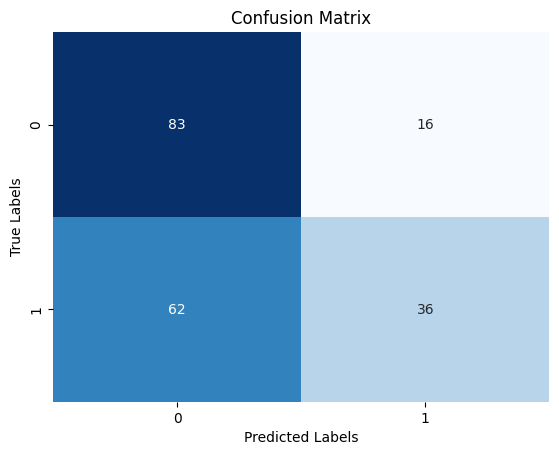

In [54]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()